<a href="https://colab.research.google.com/github/nisarg0/Assignments/blob/master/DWDM1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


*   The Dataset I have chosen is of 120 years of olympics.
*   The Dataset is Catagorical as well as numerical.
https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results
*   Used various python libararies like numpy, pandas, matplot, sklearn, sympy, scipy for better understanding.











In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sklearn

# scipy imports
from scipy import constants
from scipy.sparse import csr_matrix

# sympy imports
from sympy import solveset, S
from sympy.abc import x
from sympy import SymmetricDifference 


In [56]:
data = pd.read_csv('/content/drive/MyDrive/Olympics/athlete_events.csv',sep=',')
df = pd.DataFrame(data)

Few functions of Pandas library 

In [57]:
# Dimensions of Dataset
print("Shape of The DataFrame is",df.shape)
print("-----------------------------------------------")
print ("Maximum age ever of an Olympian is ",df.Age.max())
print ("Minimum age ever of an Olympian is ",df.Age.min())
print("-----------------------------------------------")
print ("Average age of an olympian is", df.Age.mean())
print("-----------------------------------------------")
print ("Median of all Olympians is: \n",df.median(axis = 0));
print("-----------------------------------------------")



Shape of The DataFrame is (271116, 15)
-----------------------------------------------
Maximum age ever of an Olympian is  97.0
Minimum age ever of an Olympian is  10.0
-----------------------------------------------
Average age of an olympian is 25.556898357297374
-----------------------------------------------
Median of all Olympians is: 
 ID        68205.0
Age          24.0
Height      175.0
Weight       70.0
Year       1988.0
dtype: float64
-----------------------------------------------


Few functions of Numpy library and Scipy

In [58]:
# Calculating total number of countries who participated in Olympics
arr = np.array(df['NOC'].values)
arr = np.unique(arr)
print("The Total number of Participant countries in olympics = ", len(arr))
for ele in arr:
    print(ele,end = " ")
print("\n-----------------------------------------------")


#Calculating average BMI of athletes
height = np.array(df['Height'].values)
weight = np.array(df['Weight'].values)

# Used scipy for convertion of centimeter to meter
BMI = weight/((height*height)*(constants.centi)*(constants.centi))
# Not using Nan values 
print(" Average BMI of an Olympian is = ",np.nanmean(BMI))
print("-----------------------------------------------")

# Compressed Sparse Row. For fast row slicing, faster matrix vector products
# Item in row 0 and postition x has value y
print(csr_matrix(height))

The Total number of Participant countries in olympics =  230
AFG AHO ALB ALG AND ANG ANT ANZ ARG ARM ARU ASA AUS AUT AZE BAH BAN BAR BDI BEL BEN BER BHU BIH BIZ BLR BOH BOL BOT BRA BRN BRU BUL BUR CAF CAM CAN CAY CGO CHA CHI CHN CIV CMR COD COK COL COM CPV CRC CRO CRT CUB CYP CZE DEN DJI DMA DOM ECU EGY ERI ESA ESP EST ETH EUN FIJ FIN FRA FRG FSM GAB GAM GBR GBS GDR GEO GEQ GER GHA GRE GRN GUA GUI GUM GUY HAI HKG HON HUN INA IND IOA IRI IRL IRQ ISL ISR ISV ITA IVB JAM JOR JPN KAZ KEN KGZ KIR KOR KOS KSA KUW LAO LAT LBA LBR LCA LES LIB LIE LTU LUX MAD MAL MAR MAS MAW MDA MDV MEX MGL MHL MKD MLI MLT MNE MON MOZ MRI MTN MYA NAM NBO NCA NED NEP NFL NGR NIG NOR NRU NZL OMA PAK PAN PAR PER PHI PLE PLW PNG POL POR PRK PUR QAT RHO ROT ROU RSA RUS RWA SAA SAM SCG SEN SEY SGP SKN SLE SLO SMR SOL SOM SRB SRI SSD STP SUD SUI SUR SVK SWE SWZ SYR TAN TCH TGA THA TJK TKM TLS TOG TPE TTO TUN TUR TUV UAE UAR UGA UKR UNK URS URU USA UZB VAN VEN VIE VIN VNM WIF YAR YEM YMD YUG ZAM ZIM 
------------------

In [59]:
# print top 5 rows
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [60]:
# print bottom 5 rows
data.tail()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN
271115,135571,Tomasz Ireneusz ya,M,34.0,185.0,96.0,Poland,POL,2002 Winter,2002,Winter,Salt Lake City,Bobsleigh,Bobsleigh Men's Four,NaN


In [61]:
# checking if there is any value NULL in Dataset
data.isnull().values.any()

True

Text(0, 0.5, 'Frequency')

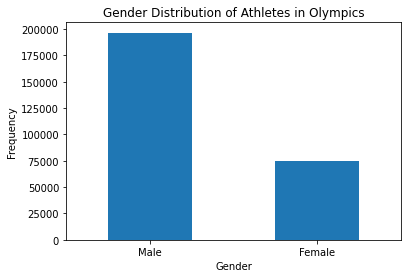

In [62]:
# To get information regarding competition in Olympics for male vs female
count_classes = pd.value_counts(data['Sex'], sort = True)
count_classes.plot(kind = 'bar', rot = 0)
plt.title("Gender Distribution of Athletes in Olympics")
LABELS = ["Male", "Female"]
plt.xticks(range(2),LABELS)
plt.xlabel("Gender")
plt.ylabel("Frequency")

In [63]:
# Average age of gold medalist

Used dictionary and list to calculate frequency of medals won by each country

In [64]:
freq_summer = {}
freq_winter = {}
total_summer = 0
total_winter = 0

# Calculating the number of medals won by each country in Summer as well as winter Olympics
for row in data.itertuples():
    if row.Season == 'Summer':
        if row.Medal == 'Gold' or row.Medal == 'Silver' or row.Medal == 'Bronze':
            if row.NOC in freq_summer:
                freq_summer[row.NOC] += 1
            else:
                freq_summer[row.NOC] = 1
            total_summer += 1
    else:
        if row.Medal == 'Gold' or row.Medal == 'Silver' or row.Medal == 'Bronze':
            if row.NOC in freq_winter:
                freq_winter[row.NOC] += 1
            else:
                freq_winter[row.NOC] = 1
            total_winter += 1

#Useful for next part
original_summer = freq_summer
original_winter = freq_winter

# The countries with medals less than 2.5% of total medals are represented in others
delete = []
other = 0

for key, value in freq_summer.items():
    if(value / total_summer < 0.025):
        delete.append(key)
        other += value
freq_summer['Other'] = other

for key in delete:
    freq_summer.pop(key)

# The countries with medals less than 2.5% of total medals are represented in others
delete.clear()
other = 0
for key, value in freq_winter.items():
    if(value / total_winter < 0.025):
        delete.append(key)
        other += value
for key in delete:
    freq_winter.pop(key)

freq_winter['Other'] = other

print("Calculations Done")

Calculations Done


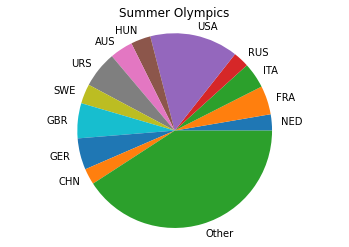

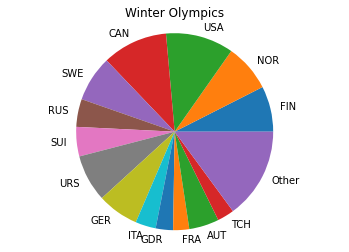

In [65]:
# Data to plot
labels = []
sizes = []
for x, y in freq_summer.items():
    labels.append(x)
    sizes.append(y)

# Plot for summer Olympics
plt.title('Summer Olympics')
plt.pie(sizes, labels=labels)
plt.axis('equal')
plt.show()

labels.clear()
sizes.clear()
for x, y in freq_winter.items():
    labels.append(x)
    sizes.append(y)

# Plot for Winter Olympics
plt.title('Winter Olympics')
plt.pie(sizes, labels=labels)
plt.axis('equal')
plt.show()


Few functions of Sympy

In [72]:
# print("Solution for eqn x^2-3x+2 = 0 is",solveset(Eq(x**2-3*x, -2),x))
# print("Solution for eqn x^2-3x+2 = 0 is",solveset(x**2 + 1, x))
print("-----------------------------------------------")

summer_participant = list(original_summer.keys())
winter_participants = list(original_winter.keys())

sum=FiniteSet(*summer_participant) 
win=FiniteSet(*winter_participants) 

print(SymmetricDifference(sum,win))


-----------------------------------------------
Union(Complement(FiniteSet(AUS, CHN, GBR, HUN, NED), FiniteSet(AUT, CAN, FIN, GDR, NOR, SUI, TCH)), Complement(FiniteSet(AUT, CAN, FIN, GDR, NOR, SUI, TCH), FiniteSet(AUS, CHN, GBR, HUN, NED)))
